# Macro projection analyses: FED vs ECB

## Set up environment

In [2]:
#Import libraries
import pandas as pd 
import numpy  as np
#Load data from Excel
df          =pd.read_excel(r'./macro scenarios.xlsx')
#Create unique values of DF IDs
t           =df.columns[4:]; IDs=df.drop(t, axis=1).columns.to_list();
df['2019Q4']=0; df=df[[*IDs, *['2019Q4'], *t]]; t=df.columns[4:];
series=df.Series.unique().tolist(); source = df.Source.unique().tolist(); scenario = df.Scenario.unique().tolist(); country = df.Country.unique().tolist();
print(df.head())

     Series Source         Scenario    Country  2019Q4  2020Q1  2020Q2  \
0  Real GDP    EBA  Historical Data  Euro Area       0     NaN     NaN   
1  Real GDP    EBA  Historical Data         UK       0     NaN     NaN   
2  Real GDP    EBA  Historical Data         US       0     NaN     NaN   
3  Real GDP    EBA         Baseline  Euro Area       0     NaN     NaN   
4  Real GDP    EBA         Baseline         UK       0     NaN     NaN   

   2020Q3     2020Q4  2021Q1  ...  2021Q3     2021Q4  2022Q1  2022Q2  2022Q3  \
0     NaN -16.482929     NaN  ...     NaN  23.271214     NaN     NaN     NaN   
1     NaN -23.260696     NaN  ...     NaN  27.367822     NaN     NaN     NaN   
2     NaN  -8.709191     NaN  ...     NaN  22.876626     NaN     NaN     NaN   
3     NaN  -7.316237     NaN  ...     NaN   3.885264     NaN     NaN     NaN   
4     NaN  -9.762215     NaN  ...     NaN   5.920651     NaN     NaN     NaN   

     2022Q4  2023Q1  2023Q2  2023Q3    2023Q4  
0       NaN     NaN     Na

## Calculate Index values so FED and ECB numbers are comparable

In [3]:
#Compound yearly percentage changes (EBA) and quarly percentage changes (FED) so they are comporable
#and retain only end of year percentage changes
delta=df[t].fillna(0).apply(lambda x: 1+x/100).cumprod(axis=1).pct_change(4, axis=1).iloc[:,4::4]
#Stack DF IDs with compounded values and merge columns into 1 column
df2  =pd.melt(pd.concat([df.drop(t, axis=1), delta], axis=1).replace({0:np.nan}), id_vars=IDs, var_name='Date', value_name='Value')
t2   =df2.columns[4:]
print(df2.head())

     Series Source         Scenario    Country    Date     Value
0  Real GDP    EBA  Historical Data  Euro Area  2020Q4 -0.164829
1  Real GDP    EBA  Historical Data         UK  2020Q4 -0.232607
2  Real GDP    EBA  Historical Data         US  2020Q4 -0.087092
3  Real GDP    EBA         Baseline  Euro Area  2020Q4 -0.073162
4  Real GDP    EBA         Baseline         UK  2020Q4 -0.097622


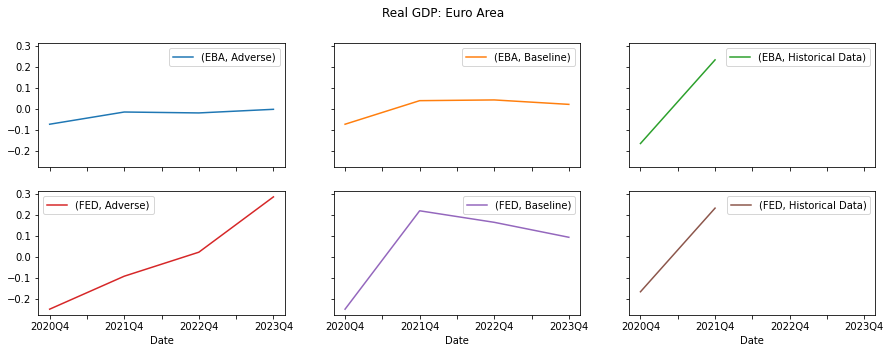

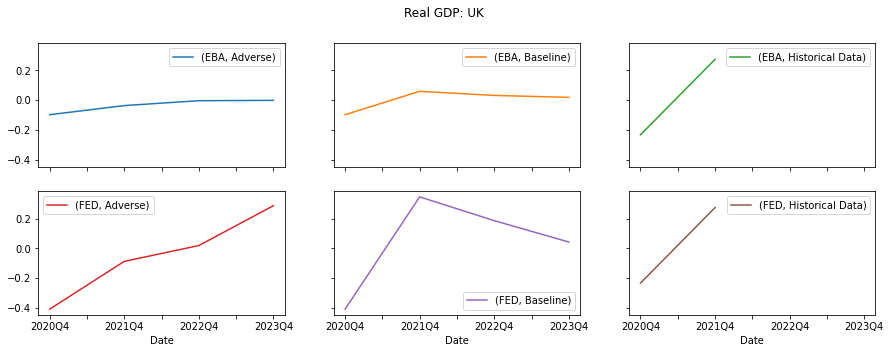

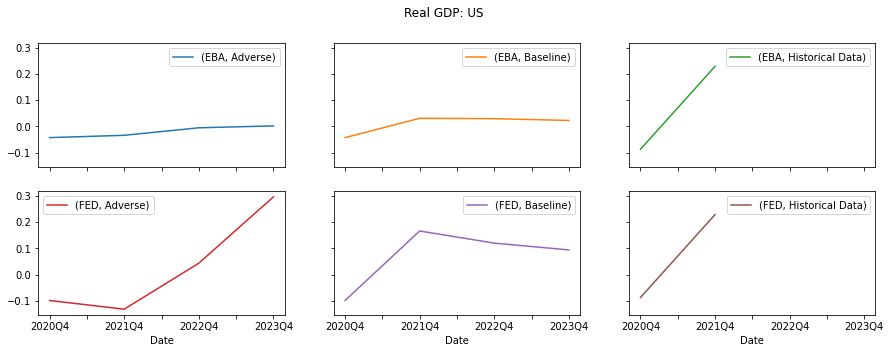

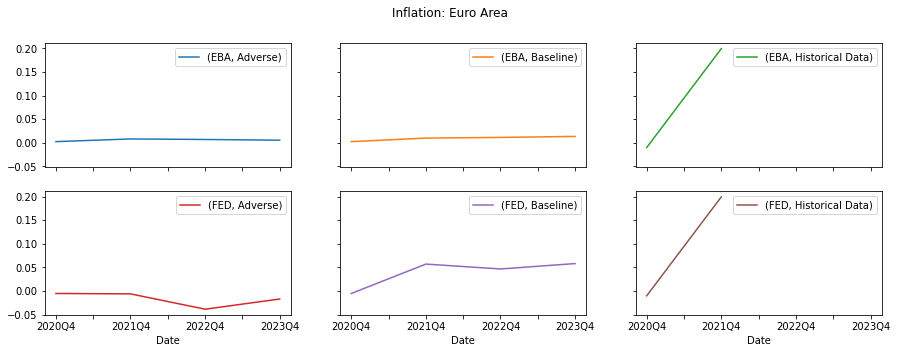

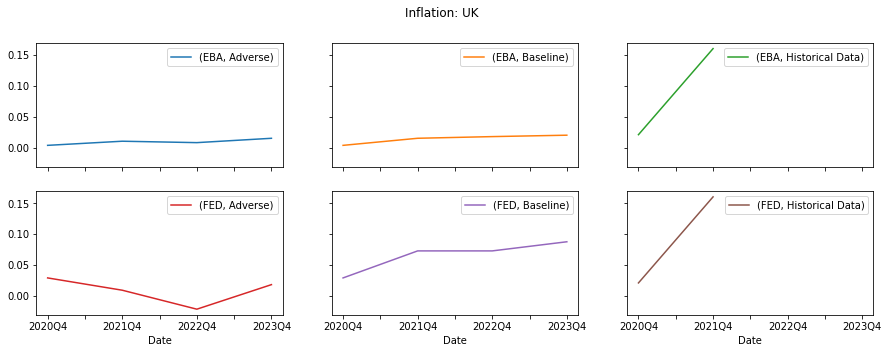

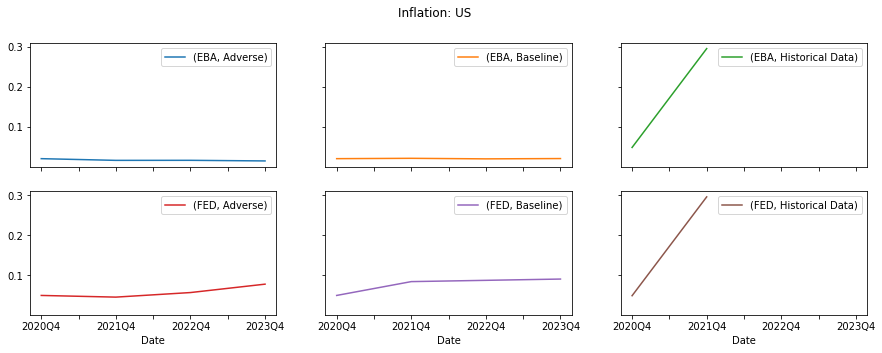

In [4]:
#Plot series by macro economic variable and Country
for i in series:
 for j in country:
  pd.pivot_table(df2[(df2.Series==i) & (df2.Country==j)].reset_index(), index='Date', columns=['Source','Scenario'], values='Value').plot(title=i+': '+j, subplots=True, layout=(2,3), figsize=(15,5), sharey=True)